# LINEAR REGRESSION - SCIKIT-LEARN

## Unit 4 assignment

Using data from global_population.csv & global_GDP.csv, undertake the following tasks.

### Task A: Correlation
- Pre-process the data - mean population of each country and mean per capita GDP (from 2001 to 2021) by making some arrangements for the missing values
- (HINT: You will need to use the datasets Global_GDP.csv and Global_Population.csv).
- Investigate any correlation between the mean population of each country and the mean per capita GDP (from 2001 to 2021).
- Very briefly, interpret the generated plot. Evaluate the Pearson Correlation Coefficient.

### Task B: Regression
- Perform linear regression, where the independent variable is the mean population of each country (from 2001 to 2021) and dependent variable is mean per capita GDP (from 2001 to 2021).

## Importing the required packages

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Load the data

In [32]:
# Read the data
global_population_df=pd.read_csv("global_population.csv")
global_GDP_df=pd.read_csv("global_GDP.csv")

## DATA OVERVIEW

### Overview
- Same column names.
- Series name and code refer to population and GDP data in respective datasets.

### Issues
- missing values (NaN)
- 2021 is missing from global_GDP

In [33]:
# Get column names from global_population_df
population_columns = global_population_df.columns.tolist()

# Get column names from global_GDP_df
gdp_columns = global_GDP_df.columns.tolist()

# Print the column names
print("Columns in global_population_df:", population_columns)
print("Columns in global_GDP_df:", gdp_columns)

Columns in global_population_df: ['Country Name', 'Country Code', 'Series Name', 'Series Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
Columns in global_GDP_df: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '

In [34]:
print("Number of columns: ", len(global_population_df.columns))
print("Number of rows: ", len(global_population_df))

Number of columns:  66
Number of rows:  272


### Issues

- Unknown why the population dataset is all objects, and GDP is floats (except first 4).
- We have to fix before its possible to compare.

In [35]:
# Take a look at the dataset
global_population_df.info()
global_population_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  269 non-null    object
 1   Country Code  267 non-null    object
 2   Series Name   267 non-null    object
 3   Series Code   267 non-null    object
 4   1960          267 non-null    object
 5   1961          267 non-null    object
 6   1962          267 non-null    object
 7   1963          267 non-null    object
 8   1964          267 non-null    object
 9   1965          267 non-null    object
 10  1966          267 non-null    object
 11  1967          267 non-null    object
 12  1968          267 non-null    object
 13  1969          267 non-null    object
 14  1970          267 non-null    object
 15  1971          267 non-null    object
 16  1972          267 non-null    object
 17  1973          267 non-null    object
 18  1974          267 non-null    object
 19  1975    

,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211,55438,56225,56695,57032,57360,...,102560,103159,103774,104341,104872,105366,105845,106314,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967,9169406,9351442,9543200,9744772,9956318,...,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341,39835000
2,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765,134159786,137614644,141202036,144920186,148769974,...,547482863,562601578,578075373,593871847,609978946,626392880,643090131,660046272,677243299,694664000
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419,98407221,100506960,102691339,104953470,107289875,...,370243017,380437896,390882979,401586651,412551299,423769930,435229381,446911598,458803476,470898000
4,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837743,2832000
5,Algeria,DZA,"Population, total",SP.POP.TOTL,11057864,11336336,11619828,11912800,12221675,12550880,...,37383899,38140135,38923688,39728020,40551398,41389174,42228415,43053054,43851043,44617000
6,American Samoa,ASM,"Population, total",SP.POP.TOTL,20127,20605,21246,22029,22850,23675,...,55669,55717,55791,55806,55739,55617,55461,55312,55197,55000
7,Andorra,AND,"Population, total",SP.POP.TOTL,13410,14378,15379,16407,17466,18542,...,82427,80770,79213,77993,77295,76997,77008,77146,77265,77000
8,Angola,AGO,"Population, total",SP.POP.TOTL,5454938,5531451,5608499,5679409,5734995,5770573,...,25107925,26015786,26941773,27884380,28842482,29816769,30809787,31825299,32866268,33934000
9,Antigua and Barbuda,ATG,"Population, total",SP.POP.TOTL,54132,55005,55849,56701,57641,58699,...,90407,91510,92562,93571,94520,95425,96282,97115,97928,99000


In [36]:
print("Number of columns: ", len(global_GDP_df.columns))
print("Number of rows: ", len(global_GDP_df))

Number of columns:  65
Number of rows:  266


In [37]:
global_GDP_df.info()
global_GDP_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            128 non-null    float64
 5   1961            134 non-null    float64
 6   1962            137 non-null    float64
 7   1963            137 non-null    float64
 8   1964            137 non-null    float64
 9   1965            148 non-null    float64
 10  1966            151 non-null    float64
 11  1967            154 non-null    float64
 12  1968            159 non-null    float64
 13  1969            159 non-null    float64
 14  1970            168 non-null    float64
 15  1971            171 non-null    float64
 16  1972            171 non-null    float64
 17  1973            171 non-null    flo

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.929944e+10,1.970954e+10,2.147872e+10,2.571501e+10,2.351080e+10,2.679160e+10,...,9.427110e+11,9.498490e+11,9.635600e+11,9.837490e+11,9.186470e+11,8.720230e+11,9.842560e+11,1.011720e+12,1.008380e+12,9.188150e+11
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,...,6.709630e+11,7.275710e+11,8.207880e+11,8.514870e+11,7.607300e+11,6.905430e+11,6.837420e+11,7.416920e+11,7.945720e+11,7.845880e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.941719e+10,5.837598e+10
5,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10,1.540024e+10,1.488763e+10
6,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.155065e+09,NaN
7,Arab World,ARB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.491550e+12,2.728990e+12,2.787520e+12,2.818610e+12,2.452010e+12,2.400960e+12,2.455070e+12,2.717930e+12,2.763200e+12,2.436290e+12
8,United Arab Emirates,ARE,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.506660e+11,3.745910e+11,3.901080e+11,4.031370e+11,3.581350e+11,3.570450e+11,3.856060e+11,4.222150e+11,4.172160e+11,3.588690e+11
9,Argentina,ARG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,2.445060e+10,1.827212e+10,2.560525e+10,2.834471e+10,...,5.301630e+11,5.459820e+11,5.520250e+11,5.263200e+11,5.947490e+11,5.575310e+11,6.436290e+11,5.248200e+11,4.519320e+11,3.892880e+11


## TASK A: DATA PREPROCESSING

### Fix population to be numeric too

- Converted to float instead of integer because will later replace NaNs with mean, which is a float.

In [38]:
# Convert '1960' to '2021' columns to numeric in global_population_df
for col in global_population_df.columns[global_population_df.columns.get_loc('1960'):global_population_df.columns.get_loc('2021') + 1]:
    global_population_df[col] = pd.to_numeric(global_population_df[col], errors='coerce').astype('Float64')  # Convert to Float64
global_population_df.info()
global_population_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  269 non-null    object 
 1   Country Code  267 non-null    object 
 2   Series Name   267 non-null    object 
 3   Series Code   267 non-null    object 
 4   1960          261 non-null    Float64
 5   1961          261 non-null    Float64
 6   1962          261 non-null    Float64
 7   1963          261 non-null    Float64
 8   1964          261 non-null    Float64
 9   1965          261 non-null    Float64
 10  1966          261 non-null    Float64
 11  1967          261 non-null    Float64
 12  1968          261 non-null    Float64
 13  1969          261 non-null    Float64
 14  1970          261 non-null    Float64
 15  1971          261 non-null    Float64
 16  1972          261 non-null    Float64
 17  1973          261 non-null    Float64
 18  1974          261 non-null    

,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,<NA>,<NA>
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835000.0
2,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694664000.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898000.0
4,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0,2832000.0
5,Algeria,DZA,"Population, total",SP.POP.TOTL,11057864.0,11336336.0,11619828.0,11912800.0,12221675.0,12550880.0,...,37383899.0,38140135.0,38923688.0,39728020.0,40551398.0,41389174.0,42228415.0,43053054.0,43851043.0,44617000.0
6,American Samoa,ASM,"Population, total",SP.POP.TOTL,20127.0,20605.0,21246.0,22029.0,22850.0,23675.0,...,55669.0,55717.0,55791.0,55806.0,55739.0,55617.0,55461.0,55312.0,55197.0,55000.0
7,Andorra,AND,"Population, total",SP.POP.TOTL,13410.0,14378.0,15379.0,16407.0,17466.0,18542.0,...,82427.0,80770.0,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0,77000.0
8,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33934000.0
9,Antigua and Barbuda,ATG,"Population, total",SP.POP.TOTL,54132.0,55005.0,55849.0,56701.0,57641.0,58699.0,...,90407.0,91510.0,92562.0,93571.0,94520.0,95425.0,96282.0,97115.0,97928.0,99000.0


#### 5-Figure Summary per Column

- Mean (mean)
- Standard Deviation (std)
- Minimum and Maximum (min, max)
- Median (50%)
- Quartile 1 (25%)
- Quartile 3 (75%)

In [39]:
global_population_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,...,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,260.0,256.0
mean,108396403.049808,109811433.448276,111742669.114943,114142375.425287,116560086.689655,119036120.042146,121641363.954023,124238589.681992,126897385.130268,129651524.708812,...,262737506.452107,266163689.977012,269600365.436782,273027020.854406,276464542.329502,279910083.536398,283278941.62069,286569910.295019,290888602.923077,298388835.9375
std,355011192.74023,359201871.780592,365443973.714966,373546129.769251,381691540.010823,390060619.65594,398961811.296816,407809927.807763,416896974.225667,426351129.724068,...,865683294.643232,876478592.238112,887269620.475383,898003702.830244,908756268.930361,919558707.900225,930054835.238314,940268926.078858,951802843.208335,967321724.41653
min,2833.0,3077.0,3367.0,3703.0,4063.0,4460.0,4675.0,4922.0,5194.0,5461.0,...,10136.0,10208.0,10289.0,10374.0,10474.0,10577.0,10678.0,10764.0,10834.0,11000.0
25%,480579.0,491140.0,502558.0,513409.0,521753.0,526327.0,529328.0,554054.0,565763.0,577644.0,...,1322696.0,1317997.0,1336073.0,1370332.0,1377563.0,1384060.0,1389841.0,1394969.0,1626933.5,1982250.0
50%,3645600.0,3703600.0,3770756.0,3879191.0,3957759.0,4038865.0,4122517.0,4208683.0,4297522.0,4389248.0,...,9446836.0,9540302.0,9696110.0,9799186.0,9814023.0,9854033.0,9965322.0,10101697.0,10254352.0,10534000.0
75%,21906909.0,22480371.0,23071309.0,23680246.0,24307855.0,24954865.0,25624380.0,26280135.0,26944386.0,27652715.0,...,50199853.0,50428893.0,50746659.0,51482638.0,53045199.0,53382521.0,53708318.0,54045422.0,55634518.0,59582250.0
max,3032156070.0,3071596055.0,3124561005.0,3189655687.0,3255145692.0,3322046795.0,3392097729.0,3461619724.0,3532782993.0,3606553753.0,...,7089254548.0,7175500378.0,7261846543.0,7347679005.0,7433569330.0,7519183459.0,7602454161.0,7683372259.0,7761620146.0,7831742000.0


In [40]:
global_GDP_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,1.280000e+02,1.340000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.480000e+02,1.510000e+02,1.540000e+02,1.590000e+02,1.590000e+02,...,2.580000e+02,2.570000e+02,2.580000e+02,2.580000e+02,2.570000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.530000e+02,2.410000e+02
mean,7.212620e+10,7.253422e+10,7.563842e+10,8.157455e+10,8.961293e+10,9.099092e+10,1.012580e+11,1.050472e+11,1.101137e+11,1.217651e+11,...,2.759371e+12,2.407733e+12,2.482235e+12,2.552297e+12,2.407171e+12,2.447089e+12,2.620383e+12,2.786476e+12,2.864599e+12,2.902891e+12
std,2.176036e+11,2.218540e+11,2.356864e+11,2.535576e+11,2.773002e+11,2.912243e+11,3.188597e+11,3.372441e+11,3.591549e+11,3.953002e+11,...,8.812007e+12,8.167101e+12,8.387677e+12,8.614521e+12,8.170629e+12,8.321307e+12,8.851830e+12,9.424050e+12,9.619814e+12,9.541022e+12
min,1.201201e+07,1.159201e+07,9.122751e+06,1.084010e+07,1.271247e+07,1.359393e+07,1.446908e+07,1.583518e+07,1.460000e+07,1.585000e+07,...,3.871181e+07,3.767177e+07,3.750908e+07,3.729061e+07,3.549207e+07,3.654780e+07,4.061925e+07,4.258816e+07,4.727146e+07,4.885555e+07
25%,4.930171e+08,5.007338e+08,5.317365e+08,5.161478e+08,5.828164e+08,5.981193e+08,6.526923e+08,6.381097e+08,6.713500e+08,7.234677e+08,...,8.106591e+09,8.709165e+09,8.747774e+09,9.297231e+09,8.738203e+09,8.666853e+09,9.565595e+09,1.046233e+10,1.131495e+10,1.218235e+10
50%,2.661047e+09,2.966849e+09,2.814319e+09,3.540403e+09,3.405333e+09,3.038595e+09,3.170500e+09,3.377453e+09,3.941700e+09,4.485778e+09,...,4.687279e+10,4.658046e+10,4.981676e+10,5.114388e+10,5.006595e+10,4.886913e+10,5.332271e+10,5.614404e+10,6.113687e+10,6.240971e+10
75%,2.209377e+10,2.947115e+10,2.886179e+10,3.341615e+10,3.106358e+10,2.717988e+10,2.892630e+10,3.037142e+10,3.339213e+10,3.744464e+10,...,5.702930e+11,5.524840e+11,5.447092e+11,5.456262e+11,5.051040e+11,5.261240e+11,5.666715e+11,5.634442e+11,5.972810e+11,7.522480e+11
max,1.387920e+12,1.444480e+12,1.546110e+12,1.666850e+12,1.825210e+12,1.988350e+12,2.157980e+12,2.296120e+12,2.478140e+12,2.733380e+12,...,8.149280e+13,7.535600e+13,7.742740e+13,7.953110e+13,7.510080e+13,7.629400e+13,8.118190e+13,8.625120e+13,8.755520e+13,8.467990e+13


### Replace NaNs with Mean

- Impute NaNs using mean. In other words: fill NaNs with mean.
- Imputation is estimating and replacing misisng values with something reasonable based on observation of the data.

In [41]:
# Select relevant columns and years
population_data = global_population_df[['Country Name', 'Country Code'] + list(global_population_df.columns[global_population_df.columns.get_loc('2001'):global_population_df.columns.get_loc('2021') + 1])]
gdp_data = global_GDP_df[['Country Name', 'Country Code'] + list(global_GDP_df.columns[global_GDP_df.columns.get_loc('2001'):global_GDP_df.columns.get_loc('2020') + 1])]

# Impute NaNs with mean
population_data = population_data.fillna(population_data.mean(numeric_only=True))
gdp_data = gdp_data.fillna(gdp_data.mean(numeric_only=True))

# Calculate mean population and GDP
population_data['Mean Population'] = population_data.iloc[:, 2:].mean(axis=1)
gdp_data['Mean GDP'] = gdp_data.iloc[:, 2:].mean(axis=1)

# Merge the dataframes based on 'Country Name'
merged_data = pd.merge(population_data[['Country Name', 'Country Code', 'Mean Population']], gdp_data[['Country Name', 'Country Code', 'Mean GDP']], on=['Country Name', 'Country Code'], how='inner')

# Display the merged data
display(merged_data.style.format({"Mean Population": "{:.2f}", "Mean GDP": "{:.2f}"}))

,Country Name,Country Code,Mean Population,Mean GDP
0,Aruba,ABW,28152663.28,290672495247.82
1,Afghanistan,AFG,30671178.33,64713919327.30
2,Africa Eastern and Southern,AFE,539868031.57,744152200000.00
3,Africa Western and Central,AFW,364777435.19,557049350000.00
4,Albania,ALB,2930952.67,10923565642.10
5,Algeria,DZA,37228087.57,145487823914.10
6,American Samoa,ASM,56909.43,51957419966.25
7,Andorra,AND,78524.14,148078632629.07
8,Angola,AGO,24650711.52,78685161602.65
9,Antigua and Barbuda,ATG,88624.33,1215262777.70


## TASK A: CORRELATION

- +1: Strong positive correlation (as population increases, GDP increases)
- -1: Strong negative correlation (as population increases, GDP decreases)
- 0: Weak or no correlation.

Outcome: 0.71 = Strong positive correlation


In [42]:
correlation = merged_data['Mean Population'].corr(merged_data['Mean GDP'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")

Pearson Correlation Coefficient: 0.71


### Correlation scatter plot

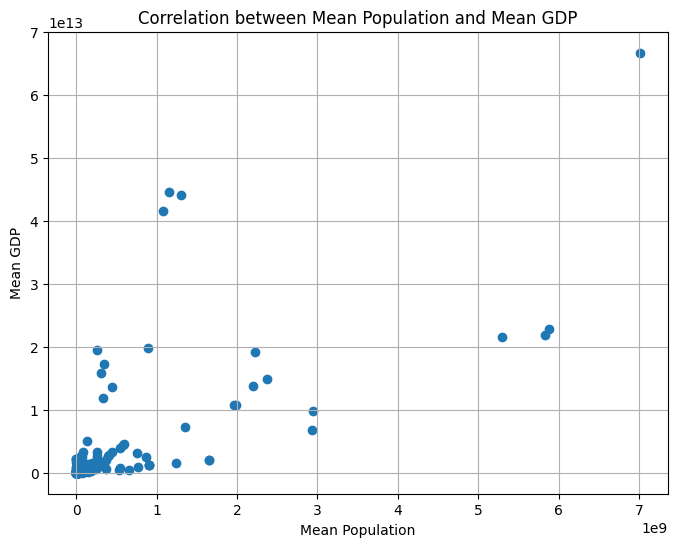

In [43]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(merged_data['Mean Population'], merged_data['Mean GDP'])
plt.xlabel("Mean Population")
plt.ylabel("Mean GDP")
plt.title("Correlation between Mean Population and Mean GDP")
plt.grid(True)  # Add a grid for better readability
plt.show()

### Correlation scatter plot (logarithmic)

- The data was too clustered around 0,0 to identify patterns.
- Big popultions were too distant to see trend.
- Log compresses.
- Data relationship may not be linear but exponential

Outcome:
- Clearly shows strong positive correlation between mean population and mean per capita GDP. Larger countries have higher per capita GDPs.
- Correlation doesn't imply causation. Other factors could influence.


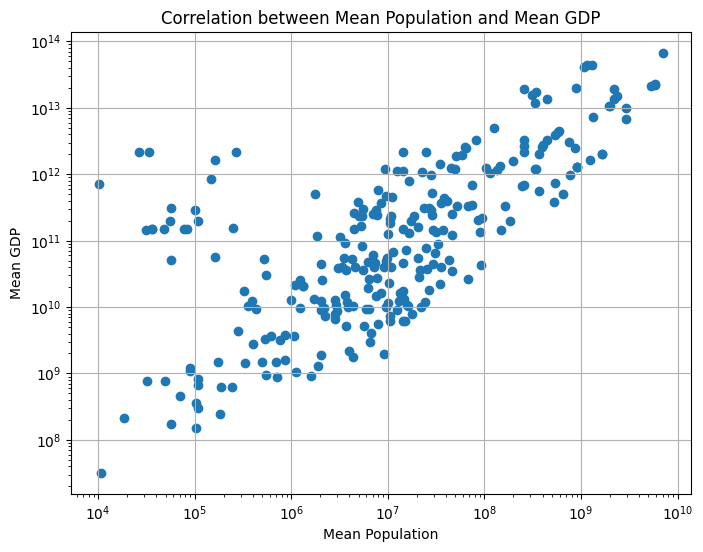

In [44]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(merged_data['Mean Population'], merged_data['Mean GDP'])
plt.xlabel("Mean Population")
plt.ylabel("Mean GDP")
plt.title("Correlation between Mean Population and Mean GDP")
plt.xscale('log')  # Logarithmic scale for x-axis
plt.yscale('log')  # Logarithmic scale for y-axis as well
plt.grid(True)  # Add a grid for better readability
plt.show()

## TASK B: REGRESSION

- The assignments asks to: Perform linear regression, where the independent variable is the mean population of each country (from 2001 to 2021) and dependent variable is mean per capita GDP (from 2001 to 2021).
- As we just showed linear regression is not the best option, it's still not, so we then try logarithmic linear regression.

### Linear Regression

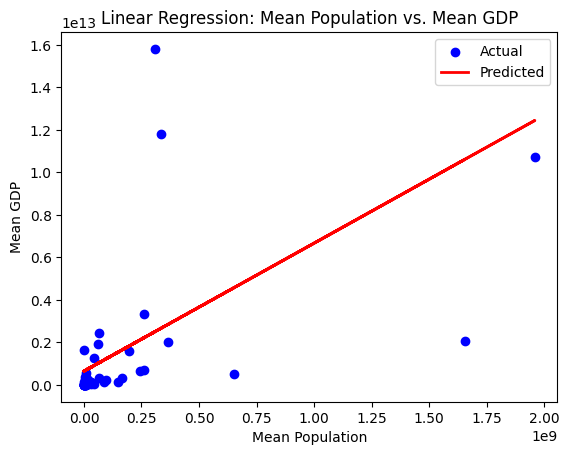

Intercept: 649490326382.5786
Regression Coefficient: 6021.493998004415


In [48]:
# 1. Prepare the data
X = merged_data[['Mean Population']]  # Independent variable
y = merged_data['Mean GDP']  # Dependent variable

# 2. Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# 3. Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions on the testing set
y_pred = model.predict(X_test)

# 5. Visualize the regression line (optional)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Mean Population")
plt.ylabel("Mean GDP")
plt.title("Linear Regression: Mean Population vs. Mean GDP")
plt.legend()
plt.show()

# 6. Print the coefficients
print("Intercept:", model.intercept_)
print("Regression Coefficient:", model.coef_[0])

### Log-Linear Regression

- Linear regression with logarithmic transformation
- Log-Log - both independent and dependent are log-transformed

Outcome:
- Non-linear relationship between the variables.
- Applying a logarithmic function to both the independent and dependent variable improved the model's performance by linearising the relationship.
- Regression coefficient: change in dependent variable fora one-unit change in independent variable.
- 0.69 indicates an 1% increase in Mean Population has a .69% increase in Mean GDP.
- Relatively strong positive relationship between population and GDP.

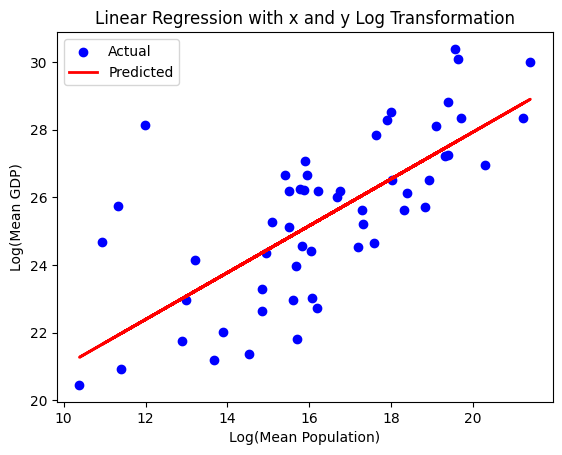

Intercept: 14.06439511932512
Regression Coefficient: 0.6935684864268155


In [54]:
# 1. Apply logarithmic transformation
X_log = np.log(merged_data[['Mean Population']])  # Log transform independent variable
y_log = np.log(merged_data['Mean GDP'])  # Log transform dependent variable

# 2. Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# 3. Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions on the testing set
y_pred = model.predict(X_test)

# 5. Visualize the regression line (optional)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Log(Mean Population)")
plt.ylabel("Log(Mean GDP)")
plt.title("Linear Regression with x and y Log Transformation")
plt.legend()
plt.show()

# 6. Print the coefficients
print("Intercept:", model.intercept_)
print("Regression Coefficient:", model.coef_[0])